# The Fast Fourier Transform

## Colophon

An annotatable worksheet for this presentation is available as [**Worksheet 19**](worksheet19).

* The source code for this page is [dft/1/dft.ipynb](https://github.com/cpjobling/eg-247-textbook/blob/master/dft/2/fft.ipynb).

* You can view the notes for this presentation as a webpage ([HTML](https://cpjobling.github.io/eg-247-textbook/dft/2/fft.html)). 

* This page is downloadable as a [PDF](https://cpjobling.github.io/eg-247-textbook/dft/2/fft.pdf) file.

## Scope and Background Reading

This session introduces the fast fourier transform (FFT) which is one of the most widely used numerical algorithms in the world. It exploits some features of the symmetry of the computation of the DFT to reduce the complexity from something that takes order $N^2$ ($O(N^2)$) complex operations to something that takes order $N \log N$ ($O(N \log N)$) operations.

The FFT is to be found in all manner of signal and image processing algorithms, and because it is more efficient than the DFT, you will find it exploited in hundreds of signal processing applications.

As one example, it turns out that the computation of the convolution of two long DT sequences is more efficient if the FFT of the two signals is taken, the product of the frequency spectra is computed, and the Inverse DFT of the result is computed.

In this presentation, we will not go through the mathematical development of the FFT, please read section 10.6 of Karris if you want the details. Here we will concentrate on the benefits to be gained by using the FFT and give some examples of its use in MATLAB.

### Acknowledgements

The material in this presentation and notes is based on [Chapter 10](https://ebookcentral.proquest.com/lib/swansea-ebooks/reader.action?docID=3384197&ppg=405) of {cite}`karris` from the **Required Reading List**. The models of the FFT signal flow graphs and Simulink block diagrams are based on the presentation given in Section 12.5 of {cite}`phillips`.

## Agenda

* The inefficiency of the DFT

* The FFT - a sketch of its development

* An illustration of part of the FFT algorithm

* FFT v DFT

* Two examples

## The inefficiency of the DFT

Consider a signal whose highest frequency is 18 kHz, the sampling frequency is 50 kHz, and 1024 samples are taken, i.e., $N=1024$.

The time required to compute the entire DFT would be:

$$t = \frac{1024\,\mathrm{samples}}{50\times 10^3\,\mathrm{samples\ per\ second}} = 20.48\,\mathrm{ms}$$

To compute the number of operations required to complete this task, let us expand the N-point DFT defined as:

$$X[m] = \sum_{n=0}^{N-1} x[n] W_N^{mn}$$

Then

$$\begin{eqnarray*}
  X[0] &=& x[0]W_N^0 + x[1]W_N^0 + x[1]W_N^0 +  \cdots  + x[N - 1]W_N^0 \hfill \\
  X[1] &=& x[0]W_N^0 + x[1]W_N^1 + x[1]W_N^2 +  \cdots  + x[N - 1]W_N^{N - 1} \hfill \\
  X[2] &=& x[0]W_N^0 + x[1]W_N^2 + x[1]W_N^4 +  \cdots  + x[N - 1]W_N^{2(N - 1)} \hfill \\
  \hfil &\cdots&  \hfill \\
  X[N - 1] &=& x[0]W_N^0 + x[1]W_N^{N - 1} + x[1]W_N^{2(N - 1)} +  \cdots  + x[N - 1]W_N^{(N - 1)^2} \hfill \\ 
\end{eqnarray*}$$

* It is worth remembering that 

$$W_N^0 = \exp\left(-j\frac{2\pi}{N}(0)\right) = 1.$$

* Since $W_N^i$ is a complex number, the computation of any frequency component $X[k]$ requires $N$ complex multiplications and $N$ complex additions

* $2N$ complex arithmetic operations are required to compute any frequency component of $X[k].$<sup>1</sup>

* If we assume that $x[n]$ is real, then only $N/2$ of the $X[m]$ components are unique.

* Therefore we would require $2N\times N/2 = N^2$ complex operations to compute the entire frequency spectrum.<sup>2</sup>

* For our example, the $N=1024$-point DFT, would require $1024^2 = 1,048,576$ complex operations

* These would have to be completed in 20.48 ms.

* This may be possible with modern computing hardware, perhaps even in a mobile phone, but it seems impractical.

* Fortunately, many of the $W_N$ terms in the computation are unity ($=\pm 1$).

* Moreover, because the $W_N^i$ points are equally spaced points on the unit circle;

* And because $N$ is a power of 2, the points on the upper-half plane (range $0 < \theta < \pi$ are the mirror image of the points on the lower-half plane range $\pi < \theta < 2\pi$;

* Thus, there is a great deal of symmetry in the computation that can be exploited to simplify the computation and reduce the number of operations considerably to a much more manageable $N\log_2 N$ operations<sup>3</sup>.

This is possible with the algorithm called the [FTT](https://en.wikipedia.org/wiki/Fast_Fourier_transform) (fast Fourier transform) that was originally developed by [James Cooley](https://en.wikipedia.org/wiki/James_Cooley) and [John Tukey](https://en.wikipedia.org/wiki/John_Tukey) and has been considerably refined since.

## The Fast Fourier Transform (FFT)

The FFT is very well documented, including in Karris, so we will only sketch its development and present its main result. However, we will illustrate part of the algorithm to make concrete an idea of the efficiency advantage that the FFT has over the DFT that we have already seen.

Much of the development follows from the properties of the rotating vector.<sup>4</sup>

$$W_N=\exp\left(-\frac{j2\pi}{N}\right)$$

which results in some simplifications and mathematical short-cuts when $N$ is a power of 2.

The most useful properties are:

$$\begin{eqnarray*}
  W_N^N &=& \exp\left(-j\frac{2\pi}{N}N\right) = \exp\left(-j2\pi\right) = 1.\\
  W_N^{N/2} &=&  \exp\left(-j\frac{2\pi}{N}\frac{N}{2}\right) = \exp\left(-j\pi\right) = -1.\\
  W_N^{N/4} &=&  \exp\left(-j\frac{2\pi}{N}\frac{N}{4}\right) = \exp\left(-j\pi/2\right) = -j.\\
  W_N^{3N/4} &=&  \exp\left(-j\frac{2\pi}{N}\frac{3N}{4}\right) = \exp\left(-j3\pi/2\right) = j.\end{eqnarray*}$$

$$\begin{eqnarray*}
  W_N^{kN} &=&  \exp\left(-j\frac{2\pi}{N}kN\right) = \exp\left(-j2\pi\right) = 1,\,k=0,1,2,\ldots\\
  W_N^{kN+r} &=&  \exp\left(-j\frac{2\pi}{N}kN\right)\exp\left(-j\frac{2\pi}{N}r\right) = 1.W_N^r=W_N^r.\\
  W_{2N}^{k} &=&  \exp\left(-j\frac{2\pi}{2N}k\right) = \exp\left(-j\frac{2\pi}{N}\frac{k}{2}\right) = W_N^{k/2}.
\end{eqnarray*}$$

Representing

$$\begin{eqnarray*}
  X[0] &=& x[0]W_N^0 + x[1]W_N^0 + x[2]W_N^0 +  \cdots  + x[N - 1]W_N^0 \hfill \\
  X[1] &=& x[0]W_N^0 + x[1]W_N^1 + x[2]W_N^2 +  \cdots  + x[N - 1]W_N^{N - 1} \hfill \\
  X[2] &=& x[0]W_N^0 + x[1]W_N^2 + x[2]W_N^4 +  \cdots  + x[N - 1]W_N^{2(N - 1)} \hfill \\
  \hfil &\cdots&  \hfill \\
  X[N - 1] &=& x[0]W_N^0 + x[1]W_N^{N - 1} + x[2]W_N^{2(N - 1)} +  \cdots  + x[N - 1]W_N^{(N - 1)^2} \hfill \\ 
\end{eqnarray*}$$

in matrix form:

$$
\left[ {\begin{array}{*{20}{c}}
{X[0]}\\
{X[1]}\\
{X[2]}\\
 \vdots \\
{X[N - 1]}\end{array}} \right] = \left[ {\begin{array}{*{20}{c}}
{W_N^0}&{W_N^0}&{W_N^0}&\cdots&{W_N^0}\\
{W_N^0}&{W_N^1}&{W_N^2}&\cdots&{W_N^{N - 1}}\\
{W_N^0}&{W_N^2}&{W_N^4}&\cdots&{W_N^{2(N - 1)}}\\
\cdots&\cdots&\cdots&\cdots&\cdots\\
{W_N^0}&{W_N^{N - 1}}&{W_N^{2(N - 1)}}&\cdots&W_N^{(N - 1)^2}\\
\end{array}} \right]\left[ {\begin{array}{*{20}{c}}
{x[0]}\\
{x[1]}\\
{x[2]}\\
 \vdots \\
{x[N - 1]}
\end{array}} \right].
$$

This is a complex [Vandemonde matrix](https://en.wikipedia.org/wiki/Vandermonde_matrix) and it is more compactly expressed as:

$$\mathbf{X}[m] = \mathbf{W_N} \mathbf{x}[n]$$

The algorithm developed by Cooley and Tukey is based on *matrix decomposition* methods, where the matrix $\mathbf{W_N}$ is factored into $L$ smaller matrices, that is:

$$\mathbf{W_N} = \mathbf{W_1} \mathbf{W_2} \mathbf{W_3} \cdots \mathbf{W_L}$$

where $L$ is chosen as $L = \log_2N$ or $N=2^L$.

Each row of the matrices on the right side of the decomposition, contains only two, non-zero terms, unity and $W_N^k$. 

And the DFT sequence is:

$$\mathbf{X}[m] = \mathbf{W_1} \mathbf{W_2} \mathbf{W_3} \cdots \mathbf{W_L} \mathbf{x}[n].$$

The FFT computation starts with matrix $\mathbf{W}_L$. It operates on $\mathbf{x}[n]$ producing a row vector, and each component of the row vector is obtained by one multiplication and one addition. This is because there are only two non-zero elements on a given row, and one of those elements is unity. Since there are $N$ components of $\mathbf{x}[n]$, there will be $N$ complex multiplications and $N$ complex additions.

This new vector is then operated on by the $\mathbf{W}_{L-1}$ matrix, then on $\mathbf{W}_{L-2}$ and so on, until the entire operation is completed.

It appears that the entire operation would require $NL= N\log_2N$ complex additions and also $N\log_2N$ complex additions.

However, since $W_N^0 = 1$, $W_N^{N/2}=-1$, and other simplifications, it is estimated that only about half of these, that is, $N\log_2 N$ total complex arithmetic operations are required by the FFT versus the $N^2$ required by the DFT<sup>5</sup>.

### Decomposition-in-Time FFT Algorithm

This development follows (Philips, *et al.*, 2015). It is called the *decomposition-in-time (DIT), radix-2, FFT*.

It allows us to visualize the FFT as a block diagram (for simulation) or a signal flow graph (for ease of drawing).

We start from a 2-point FFT ($N=2$), and work up to an 8-point FFT ($N=8$) before generalizing the result.

We have implemented each algorithm in Simulink so we are able illustrate these structures with executable examples as we go.

#### 2-Point DFT

$$X[k] = \sum_{n=0}^1 x[n]W^{nk}_2 = x[0]W_2^{0k} + X[1]W_2^{1k},\,k=0,1.$$

Because $W_2^{0k}=\exp\left(j0\right)=1$ and $W_2^{1k}=\exp\left(-j\pi k\right)=(-1)^k$, we write

$$\begin{eqnarray*}
X[0] &=& x[0]+x[1];\\
X[1] &=& x[0]-x[1].
\end{eqnarray*}$$

In general for the 2-point DFT, we have

$$X[k]=x[0]+(-1)^kx[1].$$

![Signal flow graph of 2-point DFT](pictures/2-point-dft-sfg.png)

An equivalent Simulink model in block diagram form is:

![2-point dft](pictures/2-point-dft.png)

#### Let's See it in MATLAB

[two_point_dft.slx](https://cpjobling.github.io/eg-247-textbook/dft/2/matlab/two_point_dft.slx)

In [1]:
cd matlab
clear all
format compact
imatlab_export_fig('print-svg')  % Static svg figures.

Error using eval
Undefined function 'imatlab_export_fig' for input arguments of type 'char'.


In [2]:
open two_point_dft

#### 4-point DFT

The 4-point DFT is given by

$$X[k] = \sum_{n=0}^3 x[n]W_4^{nk}= x[0]W_4^{0k} + x[1]W_4^{1k} + x[2]W_4^{2k} + x[3]W_4^{3k}.$$

As a result of the periodicity of the weighting factor, we can simplify this expression:

$$\begin{eqnarray*}
W_N^{nk} &=& \exp\left(-j(2\pi/N)nk\right);\\
W_4^{0k} &=& 1;\\
W_4^{1k} &=& \exp\left(-j(\pi/2)k\right) = (-j)^k;\\
W_4^{2k} &=& \exp\left(-j\pi k\right) = (-1)^k;\\
W_4^{3k} &=& W_4^{2k}W_4^{1k}=(-1)^k W_4^{1k}.
\end{eqnarray*}$$

Using these results, we write

$$\begin{eqnarray*}
X[k] &=&  x[0] + x[1]W_4^{1k} + x[2](-1)^k + x[3](-1)^kW_4^{1k},\\
X[k] &=&  \left[x[0] + x[2](-1)^k\right] \left[x[1] +  x[3](-1)^k\right]W_4^{1k}.
\end{eqnarray*}$$

To clarify the next step, we define two new variables

$$\begin{eqnarray*}
x_e[n]&=&x[2n],\,n=0,1;\\
x_o[n]&=&x[2n+1],\,n=0,1.
\end{eqnarray*}$$

Then,

$$X[k] =  \left[x_e[0] + x_e[1](-1)^k\right] + \left[x_o[0] + x_o[1](-1)^k\right]W_4^{1k}.$$

The factors in brackets in this equation can be recognized as 2-point DFTs:

$$\begin{eqnarray*}
X_e[m] &=& x_e[0] + x_e[1](-1)^m,\;m=0,1;\\
X_o[m] &=& x_o[0] + x_o[1](-1)^m,\;m=0,1.
\end{eqnarray*}$$

Note that $X_e[k]$ and $X_o[k]$ are periodic; for example,

$$X_e[2]= x_e[0]+ x_e[1](-1)^2 = X_e[0]$$

and

$$X_o[3]= x_o[0]+ x_o[1](-1)^3 = X_o[1]$$

The 4-point DFT then is

$$\begin{eqnarray*}
X[0] &=& X_e[0] + X_o[0]W_4^{1(0)} = X_e[0] + X_o[0];\\
X[1] &=& X_e[1] + X_o[1]W_4^{1(1)} = X_e[1] + X_o[1]W_4^1;\\
X[2] &=& X_e[0] - X_o[0]W_4^{1(2)} = X_e[0] - X_o[0];\\
X[3] &=& X_e[1] - X_o[1]W_4^{1(3)} = X_e[1] + X_o[1]W_4^1.
\end{eqnarray*}$$

We see that the 4-point DFT can be computed by the generation of two 2-point DFTs, followed by a *recomposition* of terms as shown in the signal flow graph below:

![Signal flow graph of 4-point DFT](pictures/4-point-dft-sfg.png)

In other words,

[4-point DFT of $x[n]$] = [2-point DFT of $x_e[n]$] + $W_4^{1k}$[2-point DFT of $x_o[n]$].

#### SIMULINK Model of 4-Point DFT

[four_point_dft.slx](https://cpjobling.github.io/eg-247-textbook/dft/2/matlab/four_point_dft.slx)

In [3]:
open four_point_dft

### In Class Example 1

Use four-point DIT FFT to confirm that the DFT of the sequence 

$$x[n] = [1, 2, 3, 4]$$

is 

$$X[m] = [10, -2+j2, -4, -2-j2].$$

<pre style="border: 2px solid blue">






















</pre>

#### 8-point DFT

$$X[k] = \sum_{n=0}^{7}x[n]W_8^{nk}.$$

After some manipulation, not reproduced here, it can be shown that the 8-point DFT is the recombination of two, 4-point DFTs that operate on the even and odd numbered values in the sequence $x[n]$ respectively.

#### Signal flow graph of 8-point DFT

![Signal flow graph of 8-point DFT](pictures/8-point-dft-sfg.png)

#### SIMULINK Model of 8-Point DFT

[eight_point_dft.slx](https://cpjobling.github.io/eg-247-textbook/dft/2/matlab/eight_point_dft.slx)

In [4]:
open eight_point_dft

#### N-Point, radix-2 DIT FFT

In general, the $N$-point, radix-2 DIT FFT is computed as the recomposition of two $(N/2)$-point FFTs) as shown in the buterfly diagram below

![N-point FFT](pictures/n-point-fft.png)

### Decomposition-in-Frequency FFT

Another approach to forming the FFT is the so-called decomposition in frequency (DIF) FFT. 

We will not cover it's development in detail (see Karris and Phillips *et al.*) if you want to follow it through.

We instead illustrate the final result for the four-point DIF FFT.

#### Signal flow graph for 4-point DIF FFT

![Signal flow chart for 4-point DIF FFT](pictures/4-point-dif-fft.png)

Note that the structure is a 4-point decompostion followed by two 2-point FFTs.

Also note that it is frequency $X_n[k]$ that is the input to the DFT stage.

### In Class Example 2

Use four two-point DIF FFT to confirm that the DFT of the sequence 

$$x[n] = [1, 2, 3, 4]$$

is 

$$X[m] = [10, -2+j2, -4, -2-j2].$$

<pre style="border: 2px solid blue">






















</pre>

#### SIMULINK Model of 4-Point DIF FFT

[four_point_dif.slx](https://cpjobling.github.io/eg-247-textbook/dft/2/matlab/four_point_dif.slx)

In [5]:
open four_point_dif

### 8-Point DIF FFT

I have created a Simulink model of the 8-point DIF FFT. I will create a signal flow graph to go with it at some point in the future.

#### SIMULINK Model of 4-Point DIF FFT

[eight_point_dif.slx](https://cpjobling.github.io/eg-247-textbook/dft/2/matlab/eight_point_dif.slx)

## Efficiency of the FFT

Wether we implement it as a Decomposition-in-Time (DIT) or a Decomposition-in-Frequency (DIF), the FFT ends up having approximately $(N/2)\log_2(N)$ multiplications and a similar number of complex additions or subtractions. 

In other words, $(N)\log_2(N)$ complex arithmetic operations.

As complex arithmetic, particularly multiplication, is very expensive, this is a great saving over the DFT which has of order $N^2$ operations.

### DFT and FFT Comparisons

Under the assumptions about the relative efficiency of the DFT and FFT we can create a table like that shown below:


| &nbsp; |  &nbsp;      | DFT         | FFT       | FFT/DFT   |
|--------|--------------|-------------|-----------|-----------|
| N      | $\log_2 N$ | $N^2$   | $N\log_2 N$ |         % | 
| 8      | 3            | 64        | 24          | 37.5      |
| 16     | 4            | 256       | 64          | 25        |
| 32     | 5            | 1,024     | 160         | 15.6      |
| 64     | 6            | 4,096     | 384         | 9.4       |
| 128    | 7            | 16,384    | 896         | 5.5       |
| 256    | 8            | 65,536    | 2,048       | 3.1       |
| 512    | 9            | 261,144   | 4,608       | 1.8       |
| 1024   | 10           | 1,048,576 | 10,240      | 1         |
| 2048   | 11           | 4,194,304 | 22,528      | 0.5       |

As you can see, the efficiency of the FFT actual gets better as the number of samples go up! 

However, there are other costs, such as the data storage needed for intermediate steps, that need to be taken into account as well. For example, an 8-point FFT requires only a 3 stage decomposition, with each stage needing storage for 8 complex numbers. That is 24 in all. Whereas a 2048 sequence will require 11 stages, storing 2048 values each. That is a total of 22,528 complex values<sup>6</sup>.

## In Class Demonstrations

### FFT in MATLAB

The FFT algorithm is implemented, in MATLAB, as the function `fft`. We will conclude the class by working through Exercises 6 and 7 from section 10.8 of Karris.

### Example 3

Plot the Fourier transform of the rectangular pulse shown below, using the MATLAB `fft` func-tion. Then, use the `ifft` function to verify that the inverse transformation produces the rectangular pulse.

![Example 3](pictures/fft_example1.png)

#### FFT for Example 3

The rectangular pulse can be produced like so

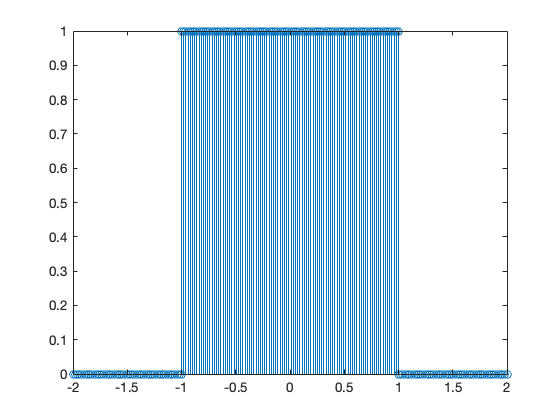

In [6]:
x = [linspace(-2,-1,50) linspace(-1,1,100) linspace(1,2,50)];
y = [linspace(0,0,50) linspace(1,1,100) linspace(0,0,50)];
stem(x,y)

and the FFT is produced as

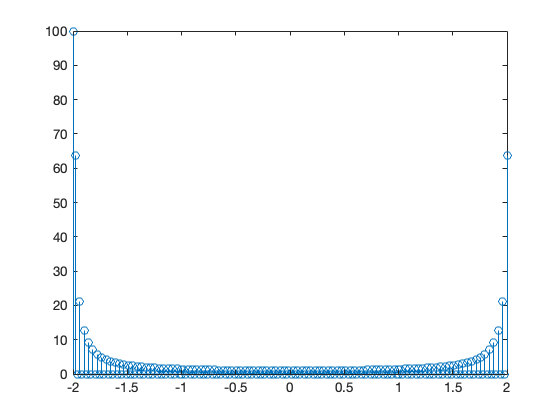

In [7]:
stem(x, abs(fft(y)))

unwind

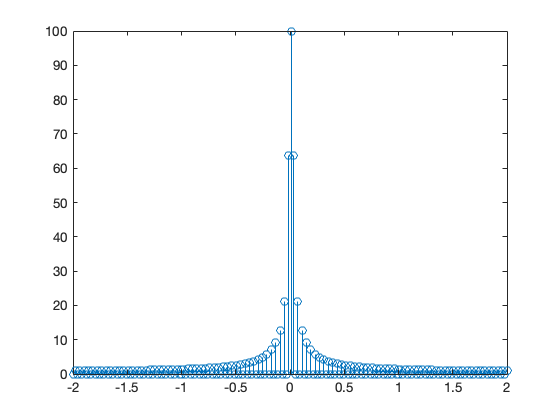

In [8]:
stem(x, abs(fftshift(fft(y))))

The inverse FFT is obtained with

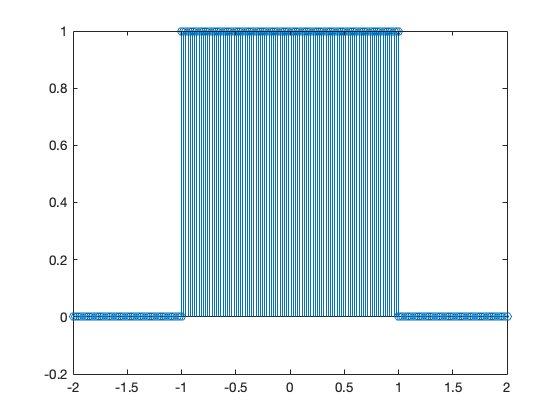

In [9]:
stem(x, ifft(fft(y)))

### Example 4

![Example 4](pictures/fft_example2.png)

#### FFT Example 4

The triangular pulse is obtained with

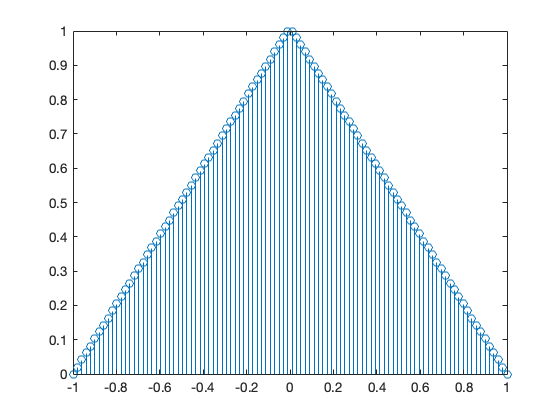

In [10]:
x = linspace(-1,1,100);
y = [linspace(0,1,50) linspace(1,0,50)];
stem(x,y)

and the FFT is obtained with

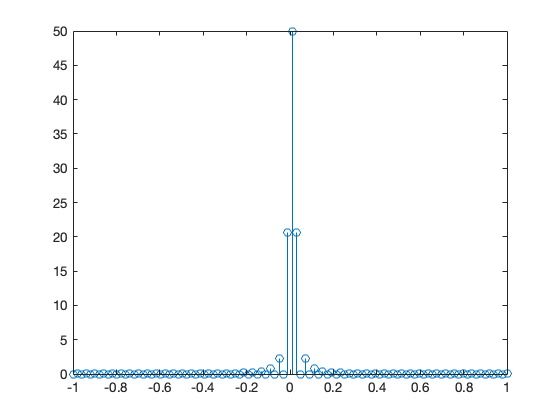

In [11]:
stem(x, abs(fftshift(fft(y))))

The inverse FFT is obtained with

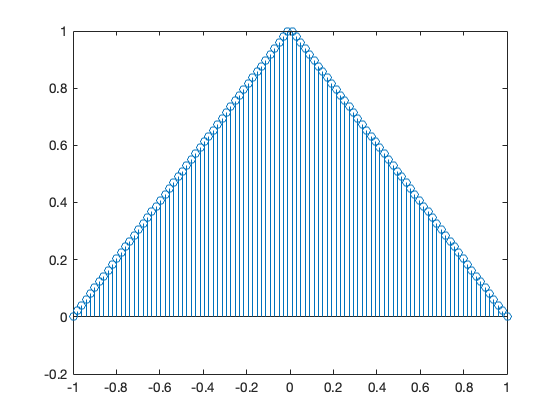

In [12]:
stem(x, ifft(fft(y)))

## Summary

* The inefficiency of the DFT
* The FFT - a sketch of its development
* An illustration of part of the FFT algorithm
* FFT v DFT
* Two examples

## Homework

Read the rest of Chapter 10 of Karris from page 10.9 and make your own notes on the implementation of the FFT.

## The End?

* This concludes this module. 
* There is some material that I have not covered, most notably is a significant amount of additional information about **Filter Design** (including the use of MATLAB for this) in Chapter 11 of Karris.

## References

See [Bibliography](/zbib).

### Footnotes

1. *Note*: addition of two complex numbers $(a + jb) + (c + jd) = (a+b) + j(b + d)$ so requires 2 floating-point additions; multiplication $(a + jb)(c + jd) = (ac - bd)+j(ad + bc)$ requires four floating-point multiplications and two additions. 

    In MATLAB, complex numbers are represented internally as two 64 bit floating point operations so each complex operation is expensive both in terms of computing time and working memory space. And the result of an N-point DFT will require twice the memory of the original sequence, assuming that it is stored as floating point real numbers, considerably 16 times the storage is needed if the original sequence is the result of sampling by, say, an 8 bit ADC.

    Of course, modern 64 bit mirocprocessers have hardware support for floating point operations and so these operations take a minumum number of machine cycles. Digital Signal Processors and Graphic Processing Units, probably have hardware support for complex arithmetic too. Nonethess, complex arithmetic is an expensive operation, so any simplifications we can make will be valuable.

2. Even if we do not have a real sequence, we only need to compute the first $N/2$ values of the spectrum because the sequence for $X[k]$ from $N/2 + 1 < k \le N-1$ are complex conjugates, in the reverse order, of the sequence of $X[k]$ for $0 \le k < N/2$. This is easy to prove by looking at the geometry of the unit circle in the z-plane.

3. If $N=1024$, $N\log_2 N = 1024\times 10 = 10,240$ complex operations.

4. The Inverse FFT (IFFT) follows by noting that the rotation vector used in its computation is the complex conjugate
$$W_N^{-1}.$$

5. Karris goes further in showing how the decomposition used to implement the FFT can be further be understood by considering even and odd decompositions. This is also the approach taken by Phillips *et al.* reproduced here.
You'll also find that most text books on Digital Signal Processing will cover the FFT and give more or less understandable presentations of the way the algorithm works.

6. A complex number in MATLAB is 2 floating point doubles or 128 bits. So a 2048 "bin" FFT needs storage in RAM for approximately $22,528\times 128 = 2.9$ Mbit ($260$ kByte) of data.

## Solutions

### Example 1

From the mathematical development and signal flow graph shown earlier:

$$\begin{eqnarray*}
X_e[0] &=& x[0] + x[2] = 1 + 3 = 4;\\
X_e[1] &=& x[0] - x[2] = 1 - 3 = -2;\\
X_o[0] &=& x[1] + x[3] = 2 + 4 = 6;\\
X_o[1] &=& x[1] - x[3] = 2 - 4 = -2.
\end{eqnarray*}$$

Thus,

$$\begin{eqnarray*}
X[0] &=& X_e[0] + X_o[0] = 4 + 6 = 10,\\
X[1] &=& X_e[1] + W_4^1 X_o[1] = -2 + (-j)(-2) = -2 - j2,\\
X[2] &=& X_e[0] - X_o[0] = 4 - 6 = -2,\\
X[3] &=& X_e[1] - W_4^1 X_o[1] = -2 - (-j)(-2) = -2 + j2.
\end{eqnarray*}$$

Q.E.D.

### Example 2

After decomposition we have:

$$\begin{eqnarray*}
X_1[0] &=& x[0] + x[2] = 1 + 3 = 4;\\
X_1[1] &=& W_4^0\left[x[1] - x[3]\right] = 2 + 4 = 6;\\
X_2[0] &=& x[0] - x[2] = 1 - 3 = -2;\\
X_2[1] &=& W_4^1\left[x[1] - x[3]\right] = -j[2 - 4] = -j2.
\end{eqnarray*}$$

Hence, after 2-point FFT:

$$\begin{eqnarray*}
X[0] &=& X_1[0] + X_1[1] = 4 + 6 = 10,\\
X[1] &=& X_2[0] + X_2[1] = -2 - j2,\\
X[2] &=& X_1[0] - X_1[1] = 4 - 6 = -2,\\
X[3] &=& X_2[0] - X_2[1] = -2 + j2.
\end{eqnarray*}$$

Q.E.D.

### Example 3

See script [fft_ex1.m](https://cpjobling.github.io/eg-247-textbook/dft/2/matlab/fft_ex1.m).

### Example 4

See script [fft_ex2.m](https://cpjobling.github.io/eg-247-textbook/dft/2/matlab/fft_ex2.m).